### Introduction to Neural network classification with Tensorflow
In this notebook we are going to learn how to write neural networks for classification.

A classification is where you try to classify something as one thing or other.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

### Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_sample = 1000

# Create circles
X, y = make_circles(n_sample, noise=0.03,random_state=42)

In [2]:
# check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check out labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

our data is little hard to understamd right now.. let's visualize it

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0],"X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


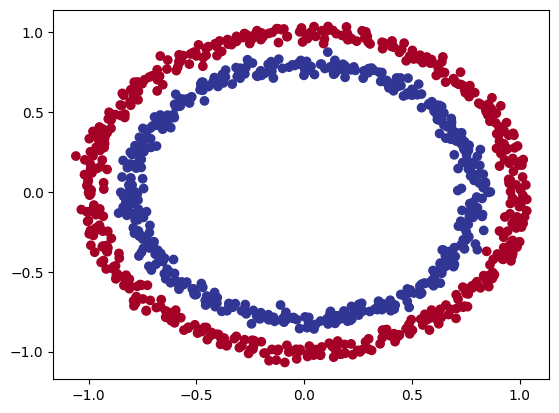

In [5]:
# Visualize with plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0],X[:, 1], c=y, cmap=plt.cm.RdYlBu)

### Input and output shape

In [6]:
# Check the shapes of your features and labels
X.shape, y.shape

((1000, 2), (1000,))

### Steps in modelling
The steps in modelling with tensorflow are typically:
* Create or import model
* Compile the model
* Fit the model
* Evaluate the model
* Tweak
* Evaluate

In [7]:
import tensorflow as tf
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 903us/step - loss: 5.2955 - accuracy: 0.4840
Epoch 2/5
32/32 [==============================] - 0s 839us/step - loss: 3.3911 - accuracy: 0.4970
Epoch 3/5
32/32 [==============================] - 0s 839us/step - loss: 0.7643 - accuracy: 0.4950
Epoch 4/5
32/32 [==============================] - 0s 848us/step - loss: 0.7133 - accuracy: 0.4960
Epoch 5/5
32/32 [==============================] - 0s 871us/step - loss: 0.7004 - accuracy: 0.4930


In [8]:
# Let's try and improve our model by training for longer period
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 806us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy.... it's performing as if it's guessing.
So let's step things up a notch and add an extra layer.

In [9]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 742us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933345198631287, 0.5]

### Improving our model
Let's look into our bag of tricks to see how we can improve our model.

* Create a model - We might add more layers or increase the number of neurons within a layer.
* Compiling a model - We might choose different optimization function such as Adam instead of SGD.
* Fitting a model - Perhaps we might fit our model for more epochs(leave it training for longer periods).

In [10]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)
model_3.evaluate(X, y)

32/32 [==============================] - 0s 741us/step - loss: 0.6988 - accuracy: 0.5090


[0.6988353729248047, 0.5090000033378601]

### To visualize our model's prediction, let's create a function `plo_decision_boundary()` this function will:

* Take in a trained model, features (X) and labels (y).
* Create a meshgrid of the differnet X values.
* Make predictions across the meshgrid.
* Plot the predictions as well as a line between zones (where each unique class falls)

In [11]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    """
    # Define the axis boundaries of the plot and create a meshgrid

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    # Create X value (we're going to make predictions on these)

    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions

    y_pred = model.predict(x_in)

    # Check for multiclass
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")

        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.around(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

  1/313 [..............................] - ETA: 18s

313/313 [==============================] - 0s 577us/step
doing binary classification


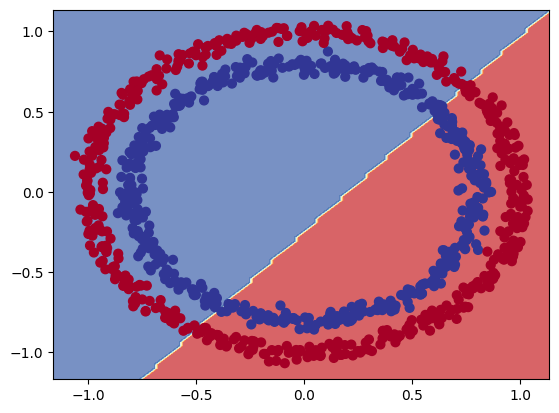

In [12]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

### The missing piece Non-linearity

In [13]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100, verbose=2)
model_4.evaluate(X, y)

Epoch 1/100


32/32 - 0s - loss: 4.2751 - accuracy: 0.4710 - 319ms/epoch - 10ms/step
Epoch 2/100
32/32 - 0s - loss: 4.2083 - accuracy: 0.4520 - 21ms/epoch - 656us/step
Epoch 3/100
32/32 - 0s - loss: 4.2060 - accuracy: 0.4510 - 22ms/epoch - 684us/step
Epoch 4/100
32/32 - 0s - loss: 4.2054 - accuracy: 0.4510 - 20ms/epoch - 625us/step
Epoch 5/100
32/32 - 0s - loss: 4.2049 - accuracy: 0.4510 - 21ms/epoch - 657us/step
Epoch 6/100
32/32 - 0s - loss: 4.1976 - accuracy: 0.4510 - 21ms/epoch - 656us/step
Epoch 7/100
32/32 - 0s - loss: 4.1933 - accuracy: 0.4510 - 21ms/epoch - 656us/step
Epoch 8/100
32/32 - 0s - loss: 4.1921 - accuracy: 0.4510 - 20ms/epoch - 623us/step
Epoch 9/100
32/32 - 0s - loss: 4.1913 - accuracy: 0.4500 - 21ms/epoch - 643us/step
Epoch 10/100
32/32 - 0s - loss: 4.1906 - accuracy: 0.4500 - 21ms/epoch - 655us/step
Epoch 11/100
32/32 - 0s - loss: 4.1898 - accuracy: 0.4490 - 20ms/epoch - 626us/step
Epoch 12/100
32/32 - 0s - loss: 4.1892 - accuracy: 0.4490 - 21ms/epoch - 664us/step
Epoch 13/100


[3.321699380874634, 0.45399999618530273]

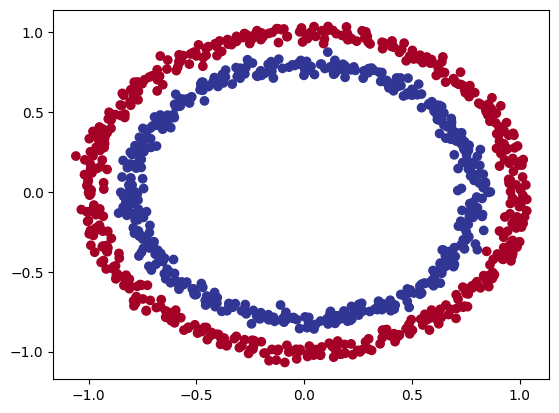

In [14]:
plt.scatter(X[:, 0],X[:, 1], c=y, cmap=plt.cm.RdYlBu)

  1/313 [..............................] - ETA: 8s

313/313 [==============================] - 0s 530us/step
doing binary classification


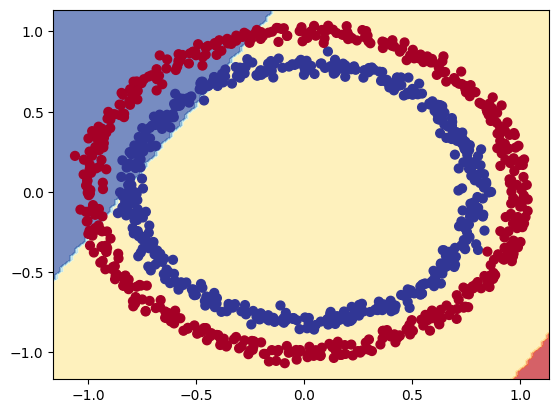

In [15]:
# Check the decision boundary for our latest boundary
plot_decision_boundary(model=model_4,X=X, y=y)

Let's try to build our first neural network with a non-linear activation function.

In [16]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model with non-linear activation function
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100, verbose=2)
model_5.evaluate(X, y)

Epoch 1/100
32/32 - 0s - loss: 5.6276 - accuracy: 0.4790 - 318ms/epoch - 10ms/step
Epoch 2/100
32/32 - 0s - loss: 5.5837 - accuracy: 0.4770 - 21ms/epoch - 656us/step
Epoch 3/100
32/32 - 0s - loss: 5.4734 - accuracy: 0.4780 - 22ms/epoch - 687us/step
Epoch 4/100
32/32 - 0s - loss: 5.4230 - accuracy: 0.4750 - 21ms/epoch - 656us/step
Epoch 5/100
32/32 - 0s - loss: 5.4077 - accuracy: 0.4760 - 22ms/epoch - 677us/step
Epoch 6/100
32/32 - 0s - loss: 5.3434 - accuracy: 0.4750 - 20ms/epoch - 625us/step
Epoch 7/100
32/32 - 0s - loss: 5.2753 - accuracy: 0.4760 - 22ms/epoch - 687us/step
Epoch 8/100
32/32 - 0s - loss: 5.2579 - accuracy: 0.4770 - 21ms/epoch - 656us/step
Epoch 9/100
32/32 - 0s - loss: 5.2342 - accuracy: 0.4760 - 25ms/epoch - 777us/step
Epoch 10/100
32/32 - 0s - loss: 5.2091 - accuracy: 0.4780 - 21ms/epoch - 657us/step
Epoch 11/100
32/32 - 0s - loss: 5.2037 - accuracy: 0.4790 - 23ms/epoch - 718us/step
Epoch 12/100
32/32 - 0s - loss: 5.1716 - accuracy: 0.4790 - 20ms/epoch - 625us/step
E

[3.6487135887145996, 0.46799999475479126]

  1/313 [..............................] - ETA: 9s

313/313 [==============================] - 0s 552us/step
doing binary classification


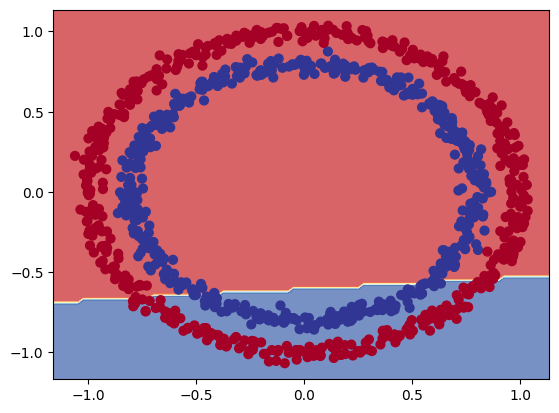

In [17]:
# Check the decision boundary for our latest boundary
plot_decision_boundary(model=model_5,X=X, y=y)

In [18]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model with non-linear activation function
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250, verbose=2)
model_6.evaluate(X, y)

Epoch 1/250


32/32 - 1s - loss: 3.2995 - accuracy: 0.4800 - 517ms/epoch - 16ms/step
Epoch 2/250
32/32 - 0s - loss: 1.6521 - accuracy: 0.4480 - 24ms/epoch - 750us/step
Epoch 3/250
32/32 - 0s - loss: 1.1335 - accuracy: 0.4480 - 23ms/epoch - 719us/step
Epoch 4/250
32/32 - 0s - loss: 1.0761 - accuracy: 0.4570 - 23ms/epoch - 715us/step
Epoch 5/250
32/32 - 0s - loss: 1.0380 - accuracy: 0.4660 - 22ms/epoch - 687us/step
Epoch 6/250
32/32 - 0s - loss: 1.0067 - accuracy: 0.4670 - 22ms/epoch - 688us/step
Epoch 7/250
32/32 - 0s - loss: 0.9814 - accuracy: 0.4710 - 22ms/epoch - 688us/step
Epoch 8/250
32/32 - 0s - loss: 0.9598 - accuracy: 0.4720 - 23ms/epoch - 719us/step
Epoch 9/250
32/32 - 0s - loss: 0.9411 - accuracy: 0.4730 - 23ms/epoch - 709us/step
Epoch 10/250
32/32 - 0s - loss: 0.9244 - accuracy: 0.4720 - 23ms/epoch - 719us/step
Epoch 11/250
32/32 - 0s - loss: 0.9096 - accuracy: 0.4750 - 23ms/epoch - 720us/step
Epoch 12/250
32/32 - 0s - loss: 0.8962 - accuracy: 0.4770 - 23ms/epoch - 718us/step
Epoch 13/250


[0.10028252005577087, 0.9810000061988831]

  1/313 [..............................] - ETA: 11s

313/313 [==============================] - 0s 578us/step
doing binary classification


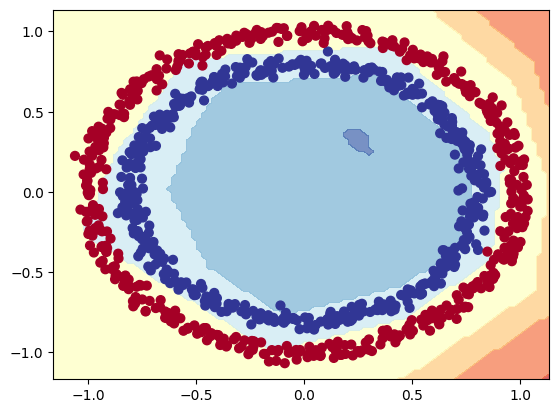

In [19]:
# Check the decision boundary for our latest boundary
plot_decision_boundary(model=model_6,X=X, y=y)

In [20]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model with non-linear activation function
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100, verbose=2)
model_7.evaluate(X, y)

Epoch 1/100
32/32 - 0s - loss: 0.6964 - accuracy: 0.5020 - 499ms/epoch - 16ms/step
Epoch 2/100
32/32 - 0s - loss: 0.6948 - accuracy: 0.5010 - 23ms/epoch - 719us/step
Epoch 3/100
32/32 - 0s - loss: 0.6938 - accuracy: 0.4950 - 22ms/epoch - 688us/step
Epoch 4/100
32/32 - 0s - loss: 0.6929 - accuracy: 0.4870 - 22ms/epoch - 687us/step
Epoch 5/100
32/32 - 0s - loss: 0.6924 - accuracy: 0.5020 - 23ms/epoch - 717us/step
Epoch 6/100
32/32 - 0s - loss: 0.6918 - accuracy: 0.4990 - 23ms/epoch - 719us/step
Epoch 7/100
32/32 - 0s - loss: 0.6910 - accuracy: 0.5050 - 23ms/epoch - 719us/step
Epoch 8/100
32/32 - 0s - loss: 0.6904 - accuracy: 0.5100 - 22ms/epoch - 688us/step
Epoch 9/100
32/32 - 0s - loss: 0.6897 - accuracy: 0.5140 - 23ms/epoch - 719us/step
Epoch 10/100
32/32 - 0s - loss: 0.6891 - accuracy: 0.5140 - 22ms/epoch - 695us/step
Epoch 11/100
32/32 - 0s - loss: 0.6884 - accuracy: 0.5160 - 23ms/epoch - 719us/step
Epoch 12/100
32/32 - 0s - loss: 0.6877 - accuracy: 0.5230 - 22ms/epoch - 688us/step
E

[0.4326621890068054, 0.8560000061988831]

313/313 [==============================] - 0s 561us/step
doing binary classification


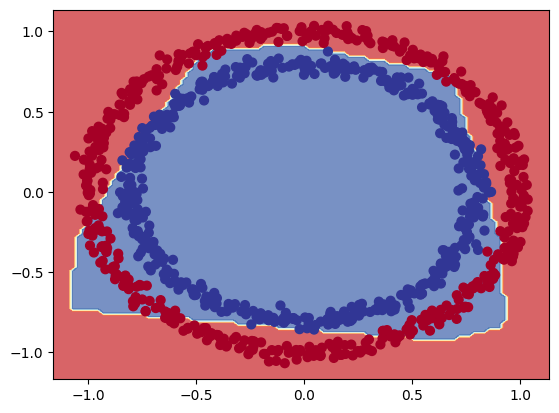

In [21]:
# Check the decision boundary for our latest boundary
plot_decision_boundary(model=model_7,X=X, y=y)

Nice! It looks like our model is almost perfectly (apart from a few examples) separating the two circles.

> 🤔 **Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

Before we answer that, it's important to recognize what we've just covered.

> 🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Think of it like this:

If I gave you an unlimited amount of straight lines and non-straight lines, what kind of patterns could you draw?

That's essentially what neural networks do to find patterns in data.

Now you might be thinking, "but I haven't seen a linear function or a non-linear function before..."

Oh but you have.

We've been using them the whole time.

They're what power the layers in the models we just built.

To get some intuition about the activation functions we've just used, let's create them and then try them on some toy data.

In [22]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

How does this look?

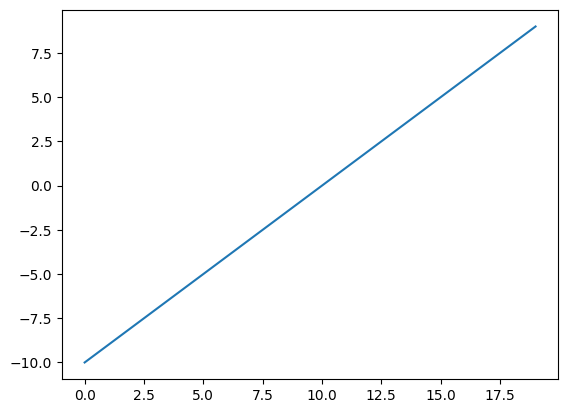

In [23]:
# Visualize our toy tensor
plt.plot(A)

A straight (linear) line!

Nice, now let's recreate the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) and see what it does to our data. You can also find a pre-built sigmoid function at [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid).

In [24]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

And how does it look?

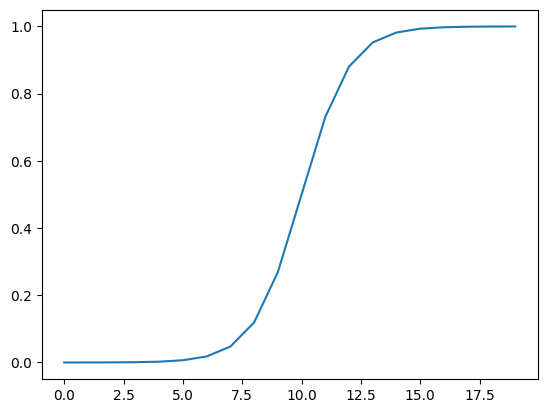

In [25]:
# Plot sigmoid modified tensor
plt.plot(sigmoid(A))

In [26]:
# Let's recreate relu function
def relu(x):
    return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

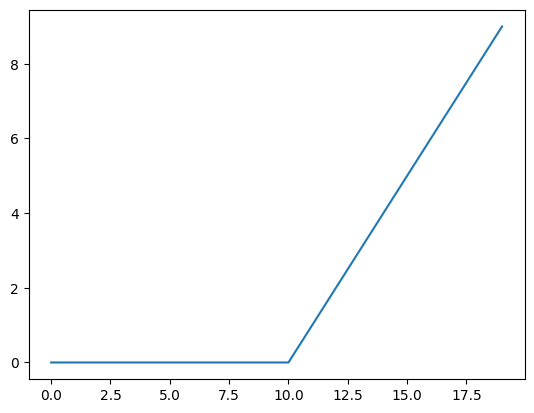

In [27]:
# Plot relu modified tensor
plt.plot(relu(A))

In [28]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

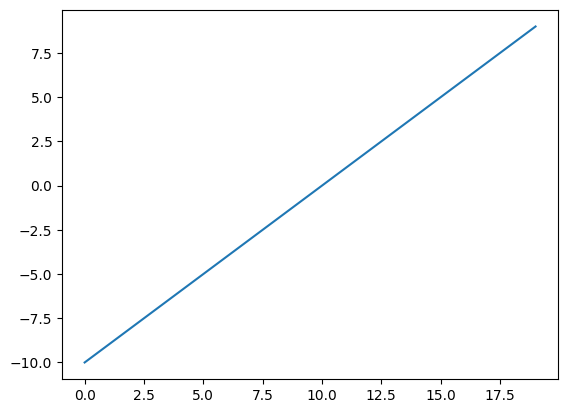

In [29]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [30]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

### Evaluating and improving our classification

So far we have been training and testing on the same datatset....
However, in machine learning this is basically a sin.
So let's create a training and test dataset.

In [31]:
# Check how many examples we have 
len(X)

1000

In [32]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [33]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 887us/step - loss: 0.7075 - accuracy: 0.4425
Epoch 2/25
25/25 [==============================] - 0s 875us/step - loss: 0.6948 - accuracy: 0.4963
Epoch 3/25
25/25 [==============================] - 0s 750us/step - loss: 0.6933 - accuracy: 0.4988
Epoch 4/25
 1/25 [>.............................] - ETA: 0s - loss: 0.6960 - accuracy: 0.3438

25/25 [==============================] - 0s 917us/step - loss: 0.6933 - accuracy: 0.4888
Epoch 5/25
25/25 [==============================] - 0s 750us/step - loss: 0.6933 - accuracy: 0.5013
Epoch 6/25
25/25 [==============================] - 0s 837us/step - loss: 0.6937 - accuracy: 0.4737
Epoch 7/25
25/25 [==============================] - 0s 792us/step - loss: 0.6931 - accuracy: 0.4963
Epoch 8/25
25/25 [==============================] - 0s 750us/step - loss: 0.6933 - accuracy: 0.5013
Epoch 9/25
25/25 [==============================] - 0s 750us/step - loss: 0.6935 - accuracy: 0.5013
Epoch 10/25
25/25 [==============================] - 0s 829us/step - loss: 0.6933 - accuracy: 0.4812
Epoch 11/25
25/25 [==============================] - 0s 750us/step - loss: 0.6935 - accuracy: 0.4837
Epoch 12/25
25/25 [==============================] - 0s 792us/step - loss: 0.6938 - accuracy: 0.4963
Epoch 13/25
25/25 [==============================] - 0s 833us/step - loss: 0.6933 - accuracy: 0.4787
Epoch 1

In [34]:
# Evaluate the model on the test dataset
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 994us/step - loss: 0.6931 - accuracy: 0.5050
Model loss on the test set: 0.6931461095809937
Model accuracy on the test set: 50.50%


100% accuracy? Nice!

Now, when we started to create `model_8` we said it was going to be the same as `model_7` but you might've found that to be a little lie.

That's because we changed a few things:
* **The `activation` parameter** - We used strings (`"relu"` & `"sigmoid"`) instead of using library paths (`tf.keras.activations.relu`), in TensorFlow, they both offer the same functionality.
* **The `learning_rate` (also `lr`) parameter** - We increased the **learning rate** parameter in the [Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) to `0.01` instead of `0.001` (an increase of 10x).
  * You can think of the learning rate as how quickly a model learns. The higher the learning rate, the faster the model's capacity to learn, however, there's such a thing as a *too high* learning rate, where a model tries to learn too fast and doesn't learn anything. We'll see a trick to find the ideal learning rate soon.
* **The number of epochs** - We lowered the number of epochs (using the `epochs` parameter) from 100 to 25 but our model still got an incredible result on both the training and test sets.
  * One of the reasons our model performed well in even less epochs (remember a single epoch is the model trying to learn patterns in the data by looking at it once, so 25 epochs means the model gets 25 chances) than before is because we increased the learning rate.

We know our model is performing well based on the evaluation metrics but let's see how it performs visually.


313/313 [==============================] - 0s 557us/step
doing binary classification
313/313 [==============================] - 0s 553us/step
doing binary classification


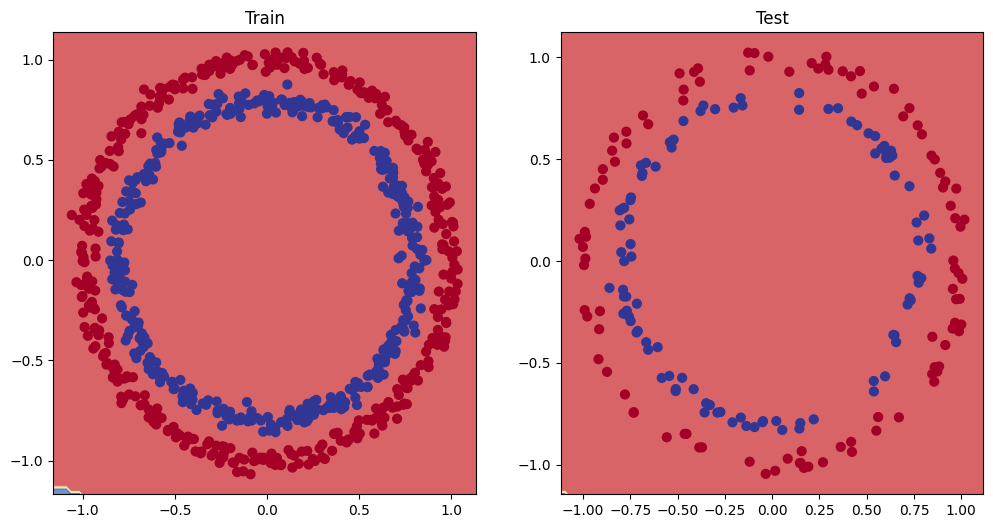

In [35]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

### Plot the loss curves

In [36]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.707535,0.44250
1,0.694810,0.49625
2,0.693342,0.49875
3,0.693294,0.48875
4,0.693347,0.50125
5,0.693689,0.47375
6,0.693126,0.49625
7,0.693271,0.50125
8,0.693548,0.50125
9,0.693263,0.48125


Text(0.5, 1.0, 'model_8 loss curves')

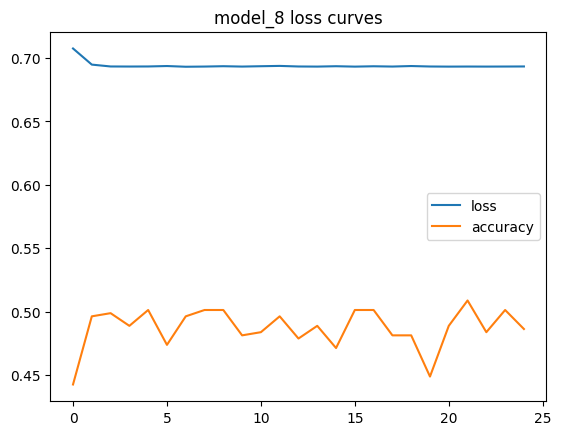

In [37]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("model_8 loss curves")

Beautiful. This is the ideal plot we'd be looking for when dealing with a classification problem, loss going down, accuracy going up.

> 🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

### Finding the best learning rate

Aside from the architecture itself (the layers, number of neurons, activations, etc), the most important hyperparameter you can tune for your neural network models is the **learning rate**.

In `model_8` you saw we lowered the Adam optimizer's learning rate from the default of `0.001` (default) to `0.01`.

And you might be wondering why we did this.

Put it this way, it was a lucky guess.

I just decided to try a lower learning rate and see how the model went.

Now you might be thinking, "Seriously? You can do that?"

And the answer is yes. You can change any of the hyperparamaters of your neural networks.

With practice, you'll start to see what kind of hyperparameters work and what don't.

That's an important thing to understand about machine learning and deep learning in general. It's very experimental. You build a model and evaluate it, build a model and evaluate it.

That being said, I want to introduce you a trick which will help you find the optimal learning rate (at least to begin training with) for your models going forward.

To do so, we're going to use the following:
* A [learning rate **callback**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler).
   * You can think of a callback as an extra piece of functionality you can add to your model *while* its training.
* Another model (we could use the same ones as above, we we're practicing building models here).
* A modified loss curves plot.

We'll go through each with code, then explain what's going on.

> 🔑 **Note:** The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the [Adam optimizer's](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.

In [38]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10**(epochs/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100


25/25 [==============================] - 0s 826us/step - loss: 0.7370 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 792us/step - loss: 0.7358 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 750us/step - loss: 0.7344 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 792us/step - loss: 0.7331 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 750us/step - loss: 0.7316 - accuracy: 0.5013 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 751us/step - loss: 0.7301 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 751us/step - loss: 0.7284 - accuracy: 0.5013 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 792us/step - loss: 0.7267 - accuracy: 0.4950 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 793us/step -

<Axes: xlabel='epochs'>

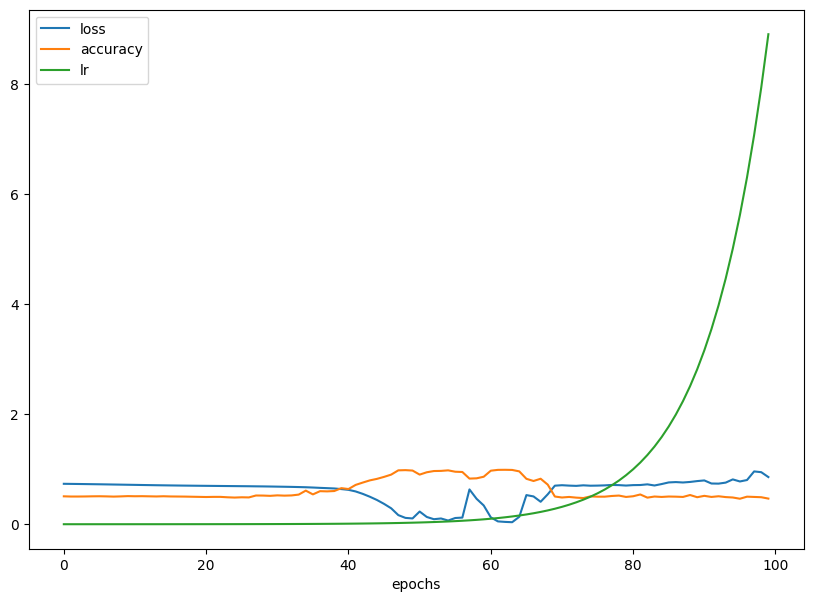

In [39]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")

As you you see the learning rate exponentially increases as the number of epochs increases.

And you can see the model's accuracy goes up (and loss goes down) at a specific point when the learning rate slowly increases.

To figure out where this infliction point is, we can plot the loss versus the log-scale learning rate.

Text(0.5, 1.0, 'Learning rate vs. loss')

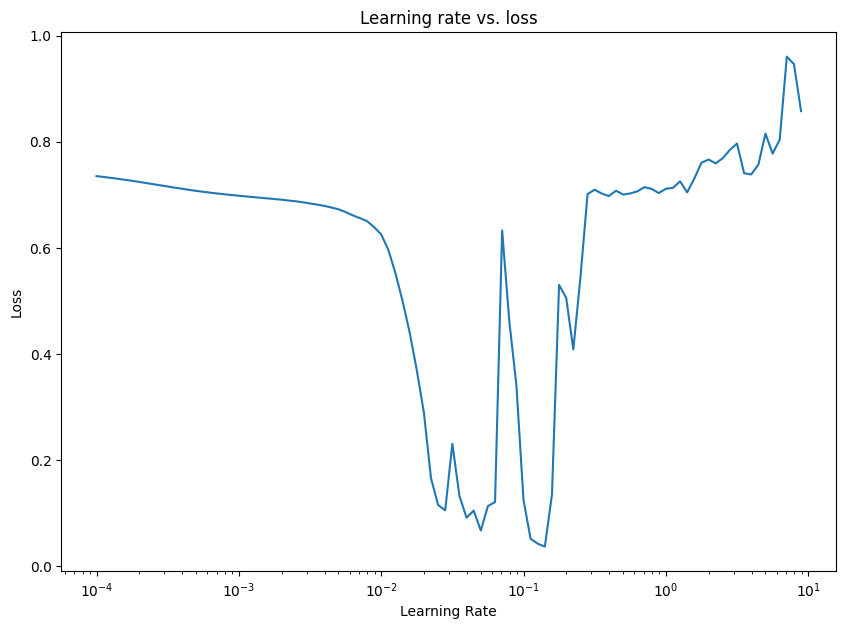

In [40]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")

To figure out the ideal value of the learning rate (at least the ideal value to *begin* training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, our ideal learning rate ends up between `0.01` ($10^{-2}$) and `0.02`.

![finding the ideal learning rate by plotting learning rate vs. loss](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-learning-rate-vs-loss.png)

*The ideal learning rate at the start of model training is somewhere just before the loss curve bottoms out (a value where the loss is still decreasing).*

In [41]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

Now we've estimated the ideal learning rate (we'll use `0.02`) for our model, let's refit it.

In [42]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20


25/25 [==============================] - 0s 919us/step - loss: 0.6810 - accuracy: 0.5962
Epoch 2/20
25/25 [==============================] - 0s 875us/step - loss: 0.6628 - accuracy: 0.6275
Epoch 3/20
25/25 [==============================] - 0s 792us/step - loss: 0.6353 - accuracy: 0.6488
Epoch 4/20
25/25 [==============================] - 0s 750us/step - loss: 0.5868 - accuracy: 0.7675
Epoch 5/20
25/25 [==============================] - 0s 750us/step - loss: 0.5221 - accuracy: 0.8188
Epoch 6/20
25/25 [==============================] - 0s 807us/step - loss: 0.3988 - accuracy: 0.9400
Epoch 7/20
25/25 [==============================] - 0s 792us/step - loss: 0.2803 - accuracy: 0.9650
Epoch 8/20
25/25 [==============================] - 0s 793us/step - loss: 0.1968 - accuracy: 0.9912
Epoch 9/20
25/25 [==============================] - 0s 791us/step - loss: 0.1614 - accuracy: 0.9837
Epoch 10/20
25/25 [==============================] - 0s 750us/step - loss: 0.1219 - accuracy: 0.9925
Epoch 11/2

Nice! With a little higher learning rate (0.02 instead of 0.01) we reach a higher accuracy than model_8 in less epochs (20 instead of 25).

In [43]:
# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0475 - accuracy: 0.9900


[0.047454286366701126, 0.9900000095367432]

Let's see how the predictions look.

313/313 [==============================] - 0s 553us/step
doing binary classification
313/313 [==============================] - 0s 557us/step
doing binary classification


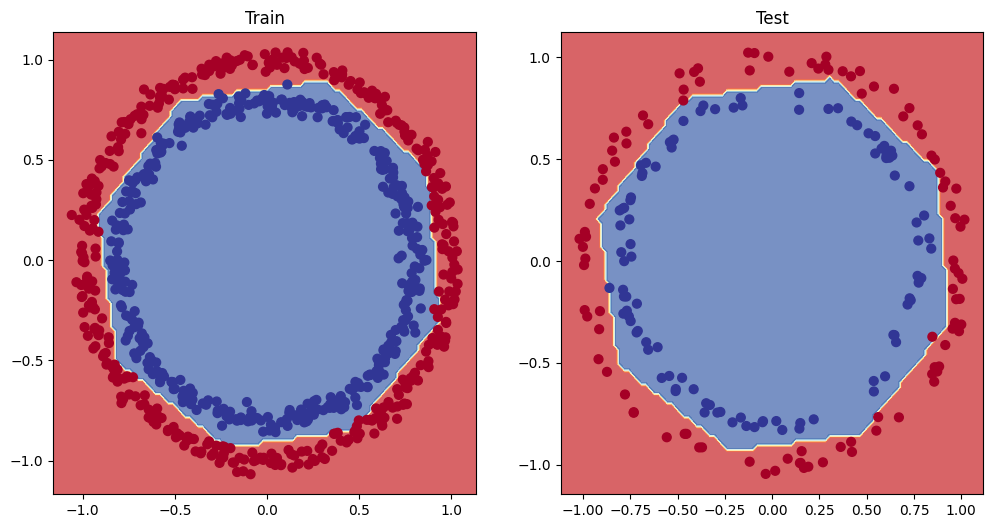

In [44]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

And as we can see, almost perfect again.

These are the kind of experiments you'll be running often when building your own models.

Start with default settings and see how they perform on your data.

And if they don't perform as well as you'd like, improve them.

Let's look at a few more ways to evaluate our classification models.

### More classification evaluation methods

Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

> 🔑 **Note:** Every classification problem will require different kinds of evaluation methods. But you should be familiar with at least the ones above.

Let's start with accuracy.

Because we passed `["accuracy"]` to the `metrics` parameter when we compiled our model, calling `evaluate()` on it will return the loss as well as accuracy.

In [45]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 999us/step - loss: 0.0475 - accuracy: 0.9900
Model loss on test set: 0.047454286366701126
Model accuracy on test set: 99.00%


How about a confusion matrix?

![anatomy of a confusion matrix](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-anatomy-of-a-confusion-matrix.png)
*Anatomy of a confusion matrix (what we're going to be creating). Correct predictions appear down the diagonal (from top left to bottom right).*

We can make a confusion matrix using [Scikit-Learn's `confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) method.

In [46]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 667us/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

Ahh, it seems our predictions aren't in the format they need to be.

Let's check them out.

In [47]:
# View the first 10 predictions
y_preds[:10]

array([[0.97607   ],
       [0.97607   ],
       [0.97607   ],
       [0.97607   ],
       [0.06168614],
       [0.02135965],
       [0.92786145],
       [0.00235567],
       [0.97607   ],
       [0.31285164]], dtype=float32)

What about our test labels?

In [48]:
# View the first 10 test labels
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

It looks like we need to get our predictions into the binary format (0 or 1).

But you might be wondering, what format are they currently in?

In their current format (`9.8526537e-01`), they're in a form called **prediction probabilities**.

You'll see this often with the outputs of neural networks. Often they won't be exact values but more a probability of how *likely* they are to be one value or another.

So one of the steps you'll often see after making predicitons with a neural network is converting the prediction probabilities into labels.

In our case, since our ground truth labels (`y_test`) are binary (0 or 1), we can convert the prediction probabilities using to their binary form using [`tf.round()`](https://www.tensorflow.org/api_docs/python/tf/math/round).

In [49]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

Wonderful! Now we can use the `confusion_matrix` function.

In [50]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]], dtype=int64)

Alright, we can see the highest numbers are down the diagonal (from top left to bottom right) so this a good sign, but the rest of the matrix doesn't really tell us much.

How about we make a function to make our confusion matrix a little more visual?

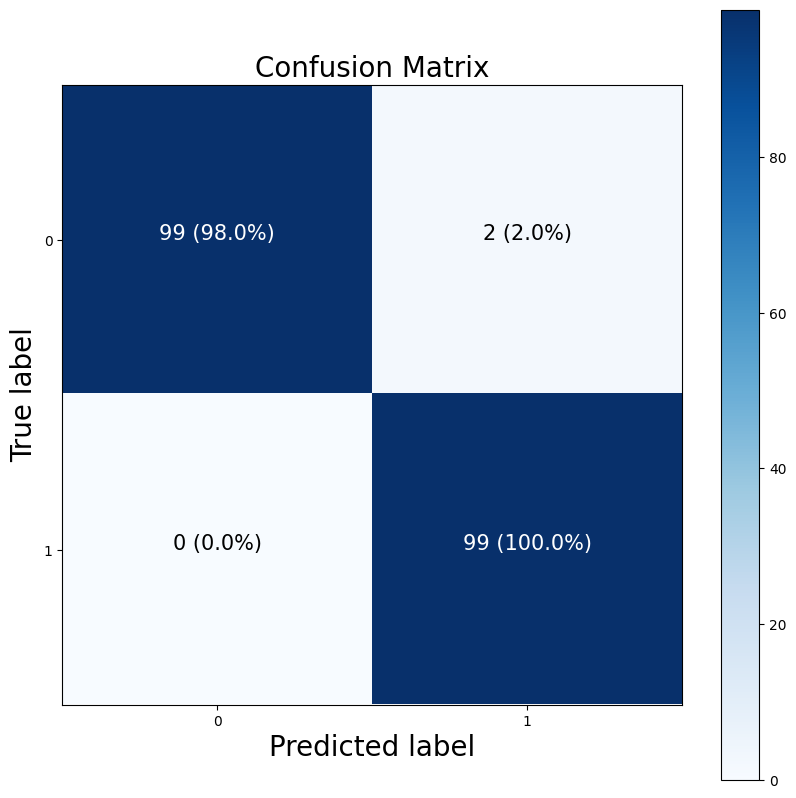

In [51]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

That looks much better. It seems our model has made almost perfect predictions on the test set except for four false positives (top right corner).

In [52]:
# What does itertools.product do? Combines two things into each combination
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  print(i, j)

0 0
0 1
1 0
1 1


### Working with a larger example (Multiclass classification)

We've seen a binary classification example (predicting if a data point is part of a red circle or blue circle) but what if you had multiple different classes of things?

For example, say you were a fashion company and you wanted to build a neural network to predict whether a piece of clothing was a shoe, a shirt or a jacket (3 different options).

When you have more than two classes as an option, this is known as **multiclass classification**.

The good news is, the things we've learned so far (with a few tweaks) can be applied to multiclass classification problems as well.

Let's see it in action.

To start, we'll need some data. The good thing for us is TensorFlow has a multiclass classication dataset known as [Fashion MNIST built-in](https://github.com/zalandoresearch/fashion-mnist). Meaning we can get started straight away.

We can import it using the [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) module.

> 📖 **Resource:** The following multiclass classification problem has been adapted from the [TensorFlow classification guide](https://www.tensorflow.org/tutorials/keras/classification). A good exercise would be to once you've gone through the following example, replicate the TensorFlow guide.

In [54]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [55]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

Woah, we get a large list of numbers, followed (the data) by a single number (the class label).

What about the shapes?

In [56]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [57]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

Okay, 60,000 training examples each with shape (28, 28) and a label each as well as 10,000 test examples of shape (28, 28).

But these are just numbers, let's visualize.

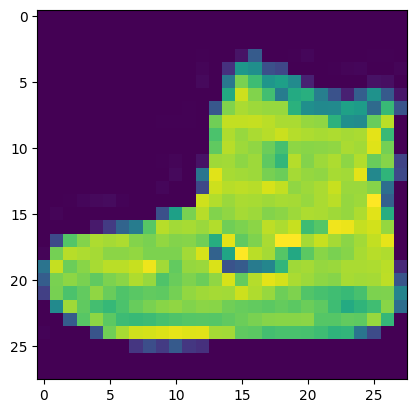

In [58]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

Hmm, but what about its label?

In [60]:
# Check our samples label
train_labels[0]

9

It looks like our labels are in numerical form. And while this is fine for a neural network, you might want to have them in human readable form.

Let's create a small list of the class names (we can find them on [the dataset's GitHub page](https://github.com/zalandoresearch/fashion-mnist#labels)).

> 🔑 **Note:** Whilst this dataset has been prepared for us and ready to go, it's important to remember many datasets won't be ready to go like this one. Often you'll have to do a few preprocessing steps to have it ready to use with a neural network (we'll see more of this when we work with our own data later).

In [61]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Now we have these, let's plot another example.

> 🤔 **Question:** Pay particular attention to what the data we're working with *looks* like. Is it only straight lines? Or does it have non-straight lines as well? Do you think if we wanted to find patterns in the photos of clothes (which are actually collections of pixels), will our model need non-linearities (non-straight lines) or not?

Text(0.5, 1.0, 'T-shirt/top')

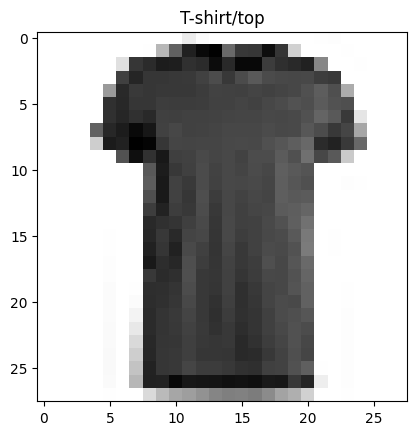

In [64]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]])

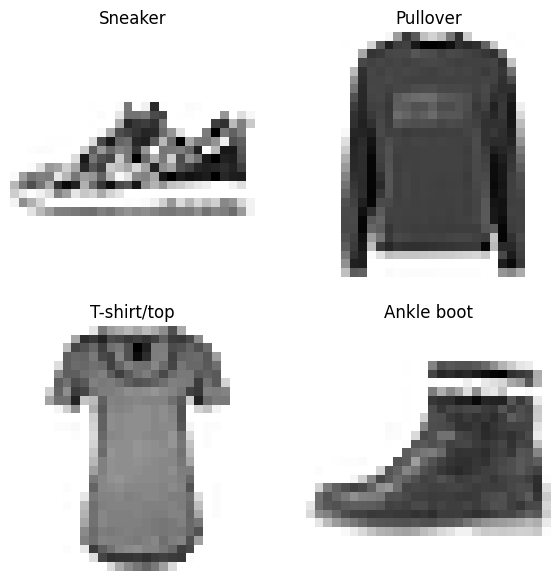

In [65]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Alright, let's build a model to figure out the relationship between the pixel values and their labels.

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

* The **input shape** will have to deal with 28x28 tensors (the height and width of our images).
  * We're actually going to squash the input into a tensor (vector) of shape `(784)`.
* The **output shape** will have to be 10 because we need our model to predict for 10 different classes.
  * We'll also change the `activation` parameter of our output layer to be [`"softmax"`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) instead of `'sigmoid'`. As we'll see the `"softmax"` activation function outputs a series of values between 0 & 1 (the same shape as **output shape**, which together add up to ~1. The index with the highest value is predicted by the model to be the most *likely* class.
* We'll need to change our loss function from a binary loss function to a multiclass loss function.
  * More specifically, since our labels are in integer form, we'll use [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy), if our labels were one-hot encoded (e.g. they looked something like `[0, 0, 1, 0, 0...]`), we'd use [`tf.keras.losses.CategoricalCrossentropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy).
* We'll also use the `validation_data` parameter when calling the `fit()` function. This will give us an idea of how the model performs on the test set during training.

You ready? Let's go.

In [66]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 2s 935us/step - loss: 2.3478 - accuracy: 0.0977 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 2s 864us/step - loss: 2.3029 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 2s 861us/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 2s 862us/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 2s 863us/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 2s 861us/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 2s 859us/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 -

In [67]:
# Check the shapes of our model
# Note: the "None" in (None, 784) is for batch_size.
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Well, right now, the data we have isn't between 0 and 1, in other words, it's not normalized (hence why we used the `non_norm_history` variable when calling `fit()`). It's pixel values are between 0 and 255.

Let's see.

In [68]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

We can get these values between 0 and 1 by dividing the entire array by the 
maximum: `255.0` (dividing by a float also converts to a float).
Doing so will result in all of our data being between 0 and 1 (known as **scaling** or **normalization**).

In [69]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

Beautiful! Now our data is between 0 and 1. Let's see what happens when we model it.

We'll use the same model as before (`model_11`) except this time the data will be normalized.

In [73]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 2s 982us/step - loss: 1.3881 - accuracy: 0.4218 - val_loss: 1.0911 - val_accuracy: 0.5232
Epoch 2/10
1875/1875 [==============================] - 2s 893us/step - loss: 0.9870 - accuracy: 0.5905 - val_loss: 0.9260 - val_accuracy: 0.6324
Epoch 3/10
1875/1875 [==============================] - 2s 898us/step - loss: 0.8347 - accuracy: 0.6715 - val_loss: 0.8071 - val_accuracy: 0.6808
Epoch 4/10
1875/1875 [==============================] - 2s 864us/step - loss: 0.7420 - accuracy: 0.7300 - val_loss: 0.7183 - val_accuracy: 0.7600
Epoch 5/10
1875/1875 [==============================] - 2s 858us/step - loss: 0.6490 - accuracy: 0.7789 - val_loss: 0.6624 - val_accuracy: 0.7731
Epoch 6/10
1875/1875 [==============================] - 2s 856us/step - loss: 0.6128 - accuracy: 0.7889 - val_loss: 0.6660 - val_accuracy: 0.7692
Epoch 7/10
1875/1875 [==============================] - 2s 866us/step - loss: 0.5976 - accuracy: 0.7946 - val_loss: 0.6622 -

Woah, we used the exact same model as before but we with normalized data we're now seeing a much higher accuracy value!

Let's plot each model's history (their loss curves).

<Axes: title={'center': 'Normalized data'}>

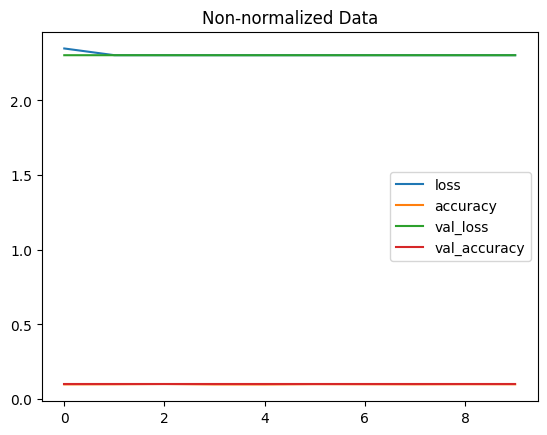

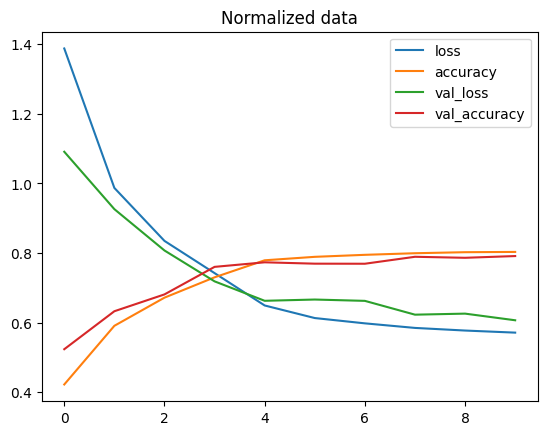

In [74]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

Wow. From these two plots, we can see how much quicker our model with the normalized data (`model_12`) improved than the model with the non-normalized data (`model_11`).

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

How about we find the ideal learning rate and see what happens?

We'll use the same architecture we've been using.

In [75]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 2s 986us/step - loss: 1.5369 - accuracy: 0.3903 - val_loss: 1.2861 - val_accuracy: 0.4667 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 2s 868us/step - loss: 1.0162 - accuracy: 0.6247 - val_loss: 0.8613 - val_accuracy: 0.6871 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 2s 873us/step - loss: 0.7329 - accuracy: 0.7313 - val_loss: 0.7276 - val_accuracy: 0.7267 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 2s 890us/step - loss: 0.6651 - accuracy: 0.7587 - val_loss: 0.6858 - val_accuracy: 0.7600 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 2s 924us/step - loss: 0.6421 - accuracy: 0.7666 - val_loss: 0.6827 - val_accuracy: 0.7515 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 2s 895us/step - loss: 0.6257 - accuracy: 0.7736 - val_loss: 0.7143 - val_accuracy: 0.7530 - lr: 0.0018
Epoch 7/40
1875/1875 [========================

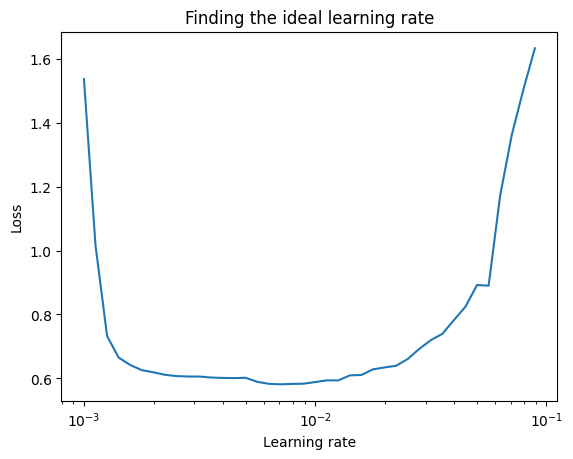

In [76]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In this case, it looks like somewhere close to the default learning rate of the [Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) (`0.001`) is the ideal learning rate.

Let's refit a model using the ideal learning rate.

In [77]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 2s 938us/step - loss: 1.1818 - accuracy: 0.5442 - val_loss: 0.7577 - val_accuracy: 0.7226
Epoch 2/20
1875/1875 [==============================] - 2s 872us/step - loss: 0.7038 - accuracy: 0.7466 - val_loss: 0.7145 - val_accuracy: 0.7409
Epoch 3/20
1875/1875 [==============================] - 2s 852us/step - loss: 0.6561 - accuracy: 0.7632 - val_loss: 0.6639 - val_accuracy: 0.7666
Epoch 4/20
1875/1875 [==============================] - 2s 858us/step - loss: 0.6310 - accuracy: 0.7733 - val_loss: 0.6630 - val_accuracy: 0.7695
Epoch 5/20
1875/1875 [==============================] - 2s 867us/step - loss: 0.6164 - accuracy: 0.7784 - val_loss: 0.6391 - val_accuracy: 0.7696
Epoch 6/20
1875/1875 [==============================] - 2s 854us/step - loss: 0.6043 - accuracy: 0.7839 - val_loss: 0.6493 - val_accuracy: 0.7759
Epoch 7/20
1875/1875 [==============================] - 2s 871us/step - loss: 0.5940 - accuracy: 0.7887 - val_loss: 0.6417 -

Now we've got a model trained with a close-to-ideal learning rate and performing pretty well, we've got a couple of options.

We could:
* Evaluate its performance using other classification metrics (such as a [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) or [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)).
* Assess some of its predictions (through visualizations).
* Improve its accuracy (by training it for longer or changing the architecture).
* Save and export it for use in an application.

Let's go through the first two options.

First we'll create a classification matrix to visualize its predictions across the different classes.

In [78]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

Since a confusion matrix compares the truth labels (`test_labels`) to the predicted labels, we have to make some predictions with our model.

In [79]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 628us/step


array([[4.1281780e-08, 1.5144888e-16, 2.1119956e-13, 6.2740053e-16,
        1.1543115e-12, 1.6433315e-01, 1.2751999e-10, 1.9206199e-01,
        2.8135144e-04, 6.4332354e-01],
       [4.9592060e-04, 8.3508772e-33, 5.3223801e-01, 3.3786311e-11,
        2.9835777e-02, 7.0166740e-13, 4.3742976e-01, 0.0000000e+00,
        5.7183024e-07, 4.0222487e-32],
       [6.1134408e-05, 9.8693848e-01, 5.6699882e-08, 1.2982318e-02,
        4.2643014e-09, 2.4926618e-07, 2.8154082e-06, 2.8406959e-13,
        1.4950416e-05, 1.5887442e-11],
       [2.9353161e-05, 9.9202794e-01, 1.2470138e-08, 7.9357233e-03,
        5.7934452e-10, 5.4936727e-08, 8.9480892e-07, 1.6307222e-14,
        6.0223406e-06, 1.4971529e-12],
       [1.4233398e-01, 1.3318617e-08, 2.7051306e-01, 1.7393732e-02,
        5.3129196e-02, 5.0016184e-05, 5.1217669e-01, 7.5831763e-17,
        4.4032796e-03, 2.5875813e-13]], dtype=float32)

Our model outputs a list of **prediction probabilities**, meaning, it outputs a number for how likely it thinks a particular class is to be the label.

The higher the number in the prediction probabilities list, the more likely the model believes that is the right class.

To find the highest value we can use the [`argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) method.

In [80]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

Now let's do the same for all of the predictions.

In [81]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

Wonderful, now we've got our model's predictions in label form, let's create a confusion matrix to view them against the truth labels

In [82]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[689,   2,   4, 153,   6,   0, 131,   0,  15,   0],
       [  0, 943,   1,  44,   8,   0,   2,   0,   2,   0],
       [ 18,   1, 555,  16, 230,   0, 173,   0,   7,   0],
       [ 34,  23,   0, 848,  43,   0,  40,   0,  11,   1],
       [  2,   0,  63,  37, 794,   0,  88,   0,  16,   0],
       [  0,   0,   0,   1,   1, 907,   0,  54,   8,  29],
       [132,   0,  60,  89, 151,   0, 533,   0,  35,   0],
       [  0,   0,   0,   0,   0,  37,   0, 925,   0,  38],
       [  0,   0,   1,  11,   7,   4,  41,   3, 927,   6],
       [  0,   0,   0,   1,   0,  16,   0,  54,   9, 920]], dtype=int64)

That confusion matrix is hard to comprehend, let's make it prettier using the function we created before.

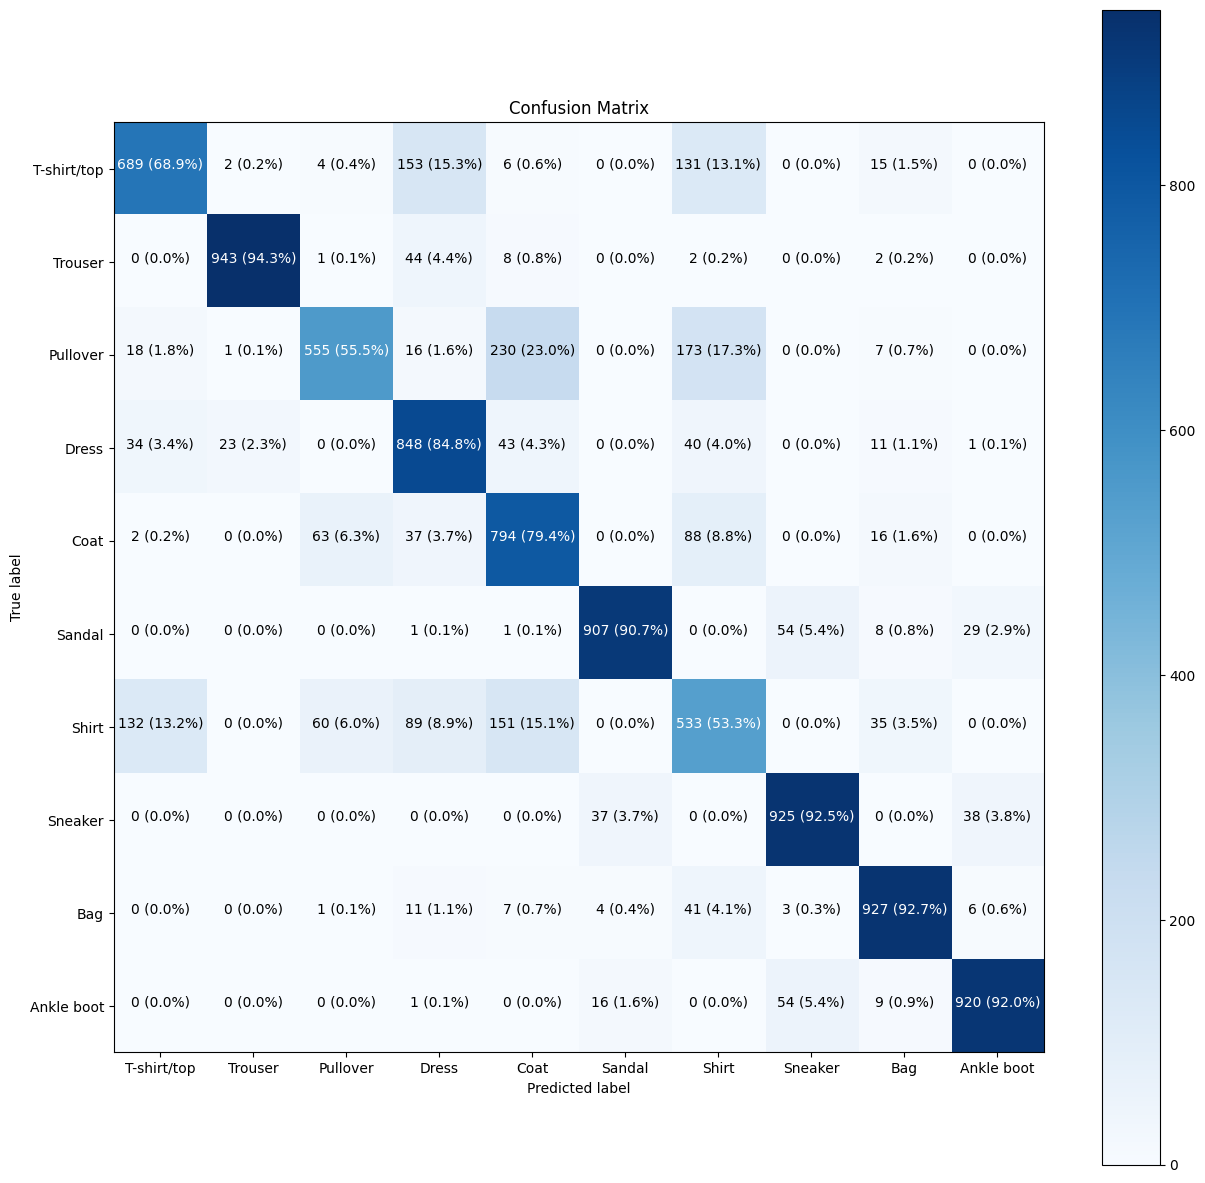

In [83]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

That looks much better! (one of my favourites sights in the world is a confusion matrix with dark squares down the diagonal)

Except the results aren't as good as they could be...

It looks like our model is getting confused between the `Shirt` and `T-shirt/top` classes (e.g. predicting `Shirt` when it's actually a `T-shirt/top`).

> 🤔 **Question:** Does it make sense that our model is getting confused between the `Shirt` and `T-shirt/top` classes? Why do you think this might be? What's one way you could investigate?

We've seen how our models predictions line up to the truth labels using a confusion matrix, but how about we visualize some?

Let's create a function to plot a random image along with its prediction.

> 🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.

In [84]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 16ms/step


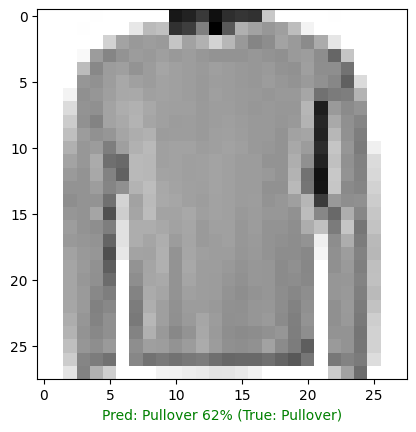

In [86]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

After running the cell above a few times you'll start to get a visual understanding of the relationship between the model's predictions and the true labels.

Did you figure out which predictions the model gets confused on?

It seems to mix up classes which are similar, for example, `Sneaker` with `Ankle boot`.

Looking at the images, you can see how this might be the case.

The overall shape of a `Sneaker` and an `Ankle Boot` are similar.

The overall shape might be one of the patterns the model has learned and so therefore when two images have a similar shape, their predictions get mixed up.